In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy import constants as const
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import eigs

In [2]:
#Import constants from scipy
# Charge of electron
e=const.e
# value of  h cross
hbar=const.hbar
# Mass of proton
m_p=const.m_p
# Mass of electron
m_e=const.m_e
#Reduce mass
mu=(m_p*m_e)/(m_p+m_e)
# Discritise radius
r=np.linspace(2e-9,0,1000,endpoint=False)
# Step size
d=r[9]-r[10]
# the constant -h**2/2md
k = -hbar**2/(2*mu*(d**2))
pi = const.pi
epsilon_0 = const.epsilon_0

In [3]:
# Laplace term
laplace=np.zeros([1000,1000])
for i in range(1000):
    laplace[i,i]=-2
    try:
        laplace[i,i+1]=1
        laplace[i+1,i]=1
    except:
        pass
print(laplace)

[[-2.  1.  0. ...  0.  0.  0.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 0.  0.  0. ...  0.  1. -2.]]


In [4]:
# Potential term
V=np.zeros([1000,1000])
for i in range(1000):
    V[i,i]=-e**2/(4*pi*epsilon_0*r[i])
print(V)

[[-1.15353878e-19  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.15469347e-19  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.15585048e-19 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -3.84512925e-17
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
  -5.76769388e-17  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00 -1.15353878e-16]]


In [5]:
laplace_term=k*laplace
H=laplace_term+V
H_sparse=csr_matrix(H)
eigenvalues, eigenvectors = eigs(H_sparse, k=30, which='SM')

In [6]:
print(laplace_term)

[[ 3.0537944e-15 -1.5268972e-15 -0.0000000e+00 ... -0.0000000e+00
  -0.0000000e+00 -0.0000000e+00]
 [-1.5268972e-15  3.0537944e-15 -1.5268972e-15 ... -0.0000000e+00
  -0.0000000e+00 -0.0000000e+00]
 [-0.0000000e+00 -1.5268972e-15  3.0537944e-15 ... -0.0000000e+00
  -0.0000000e+00 -0.0000000e+00]
 ...
 [-0.0000000e+00 -0.0000000e+00 -0.0000000e+00 ...  3.0537944e-15
  -1.5268972e-15 -0.0000000e+00]
 [-0.0000000e+00 -0.0000000e+00 -0.0000000e+00 ... -1.5268972e-15
   3.0537944e-15 -1.5268972e-15]
 [-0.0000000e+00 -0.0000000e+00 -0.0000000e+00 ... -0.0000000e+00
  -1.5268972e-15  3.0537944e-15]]


In [7]:
eig_vas=[]
eig_ves=[]
for i,j in sorted(zip(eigenvalues,eigenvectors.T)):
    eig_vas.append(i)
    eig_ves.append(j)
eig_values=np.array(eig_vas)
eig_vectors=np.array(eig_ves)

c:\users\bhawa\python\global_env\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\users\bhawa\python\global_env\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\users\bhawa\python\global_env\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


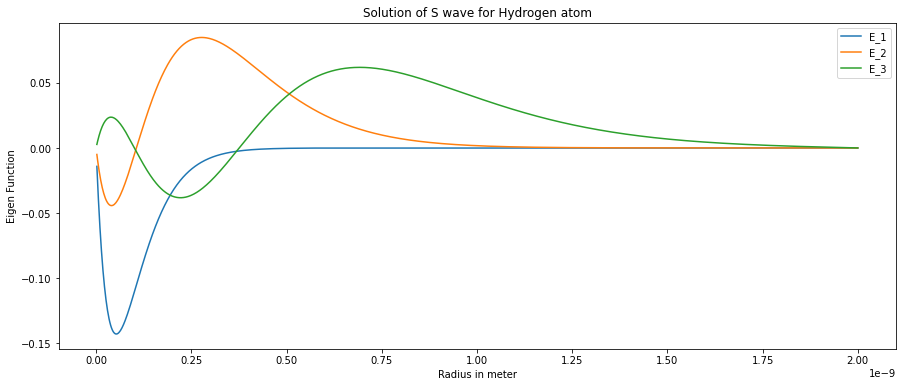

In [8]:
plt.figure(figsize=(15,6))
plt.xlabel("Radius in meter")
plt.ylabel("Eigen Function")
plt.title("Solution of S wave for Hydrogen atom")
for i in range(3):
    plt.plot(r,eig_vectors[i])
plt.legend(["E_1","E_2","E_3"])

In [9]:
densities = [np.absolute(eig_vectors[i, :])**2 for i in range(len(sorted_eigenvalues))]

NameError: name 'sorted_eigenvalues' is not defined

In [ ]:
plt.figure(figsize=(15,6))
plt.xlabel("Radius in meter")
plt.ylabel("Probability density")
plt.title("Solution of S wave for Hydrogen atom")
for i in range(3):
    plt.plot(r,densities[i])
plt.legend(["E_1","E_2","E_3"])